In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Renan\desktop\accepted_2007_to_2018Q4.csv',low_memory=False)

In [3]:
# Asegurate de convertir la columna a tipo fecha
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Filtrar préstamos emitidos entre 2010 y 2014
df_filtrado = df[(df['issue_d'].dt.year >= 2010) & (df['issue_d'].dt.year <= 2014)]

In [4]:
# Paso 1: Filtrar solo préstamos con estado final
df = df_filtrado[df_filtrado['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Paso 2: Crear variable binaria objetivo
df_filtrado['target'] = df_filtrado['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1117060,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1117061,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1117062,37822187,NaN,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1117063,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1117065,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Seleccionar variables más relevantes según análisis de importancia
variables = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'purpose', 'dti', 'fico_range_low', 'fico_range_high',
    'open_acc', 'revol_util', 'pub_rec', 'target'
]

In [7]:
df_modelo = df_filtrado[variables].copy()

In [8]:
df_filtrado['target'].value_counts(normalize=True)


target
0    0.834931
1    0.165069
Name: proportion, dtype: float64

In [9]:
print("El número de columnas del dataset es: {}". format(df_modelo.shape[1])) 
print("El número de filas en el dataset es: {}". format(df_modelo.shape[0])) 
print("Los nombres de las variables son: {}". format(list(df_modelo.columns))) 

El número de columnas del dataset es: 18
El número de filas en el dataset es: 458068
Los nombres de las variables son: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'fico_range_low', 'fico_range_high', 'open_acc', 'revol_util', 'pub_rec', 'target']


In [10]:
df_modelo.shape  # Filas y columnas
df_modelo.info()  # Tipos de datos y nulos
df_modelo.describe()  # Estadísticas para columnas numéricas
df_modelo.head()  # Primeros registros

<class 'pandas.core.frame.DataFrame'>
Index: 458068 entries, 1117060 to 1939378
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            458068 non-null  float64
 1   term                 458068 non-null  object 
 2   int_rate             458068 non-null  float64
 3   installment          458068 non-null  float64
 4   grade                458068 non-null  object 
 5   sub_grade            458068 non-null  object 
 6   emp_length           437050 non-null  object 
 7   home_ownership       458068 non-null  object 
 8   annual_inc           458068 non-null  float64
 9   verification_status  458068 non-null  object 
 10  purpose              458068 non-null  object 
 11  dti                  458068 non-null  float64
 12  fico_range_low       458068 non-null  float64
 13  fico_range_high      458068 non-null  float64
 14  open_acc             458068 non-null  float64
 15  revol_util     

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,fico_range_low,fico_range_high,open_acc,revol_util,pub_rec,target
1117060,10400.0,36 months,6.99,321.08,A,A3,8 years,MORTGAGE,58000.0,Not Verified,credit_card,14.92,710.0,714.0,17.0,31.6,0.0,1
1117061,15000.0,60 months,12.39,336.64,C,C1,10+ years,RENT,78000.0,Source Verified,debt_consolidation,12.03,750.0,754.0,6.0,29.0,0.0,0
1117062,9600.0,36 months,13.66,326.53,C,C3,10+ years,RENT,69000.0,Source Verified,debt_consolidation,25.81,680.0,684.0,12.0,59.4,0.0,0
1117063,7650.0,36 months,13.66,260.20,C,C3,< 1 year,RENT,50000.0,Source Verified,debt_consolidation,34.81,685.0,689.0,11.0,91.9,0.0,1
1117064,12800.0,60 months,17.14,319.08,D,D4,10+ years,MORTGAGE,125000.0,Verified,car,8.31,665.0,669.0,8.0,100.9,0.0,0


In [11]:
df_modelo['target'].value_counts(normalize=True) * 100



target
0    83.493062
1    16.506938
Name: proportion, dtype: float64

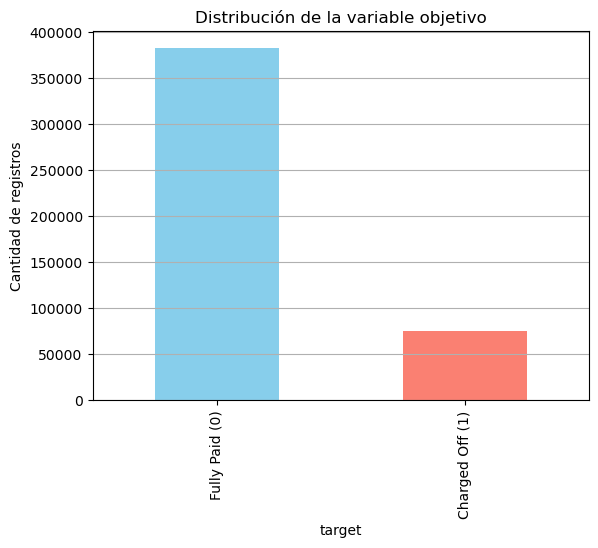

In [12]:
df_modelo['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la variable objetivo')
plt.xticks(ticks=[0,1], labels=['Fully Paid (0)', 'Charged Off (1)'])
plt.ylabel('Cantidad de registros')
plt.grid(axis='y')
plt.show()

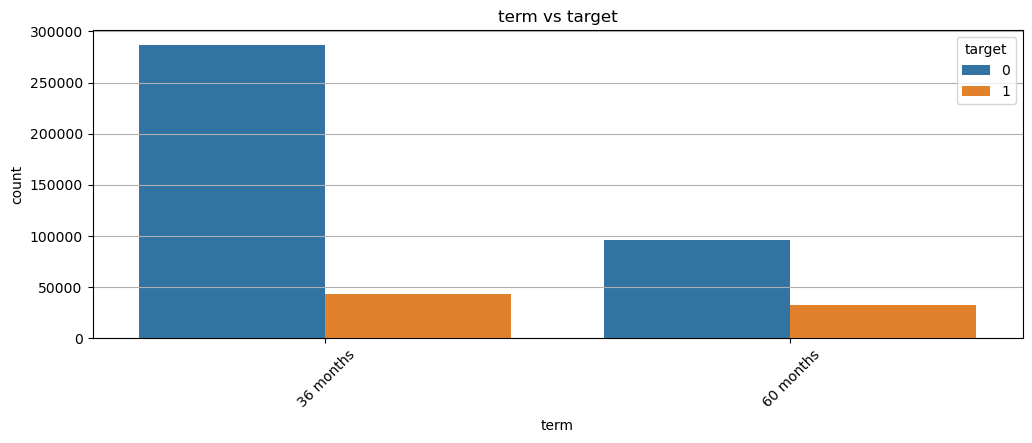

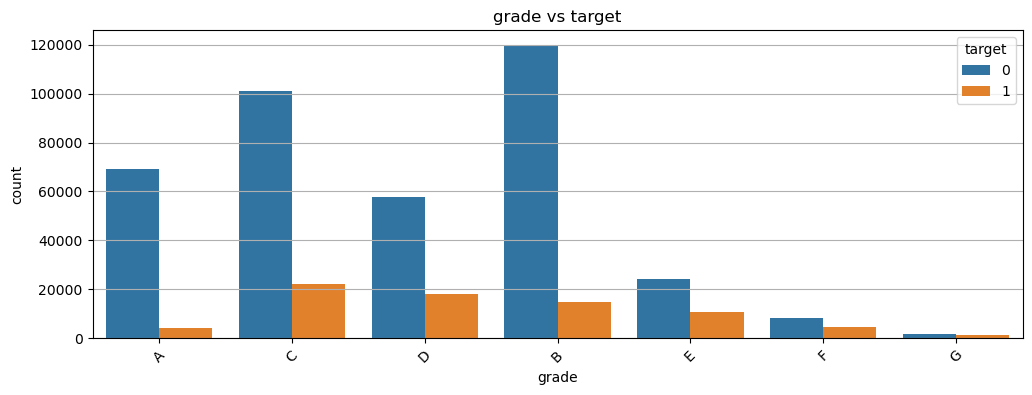

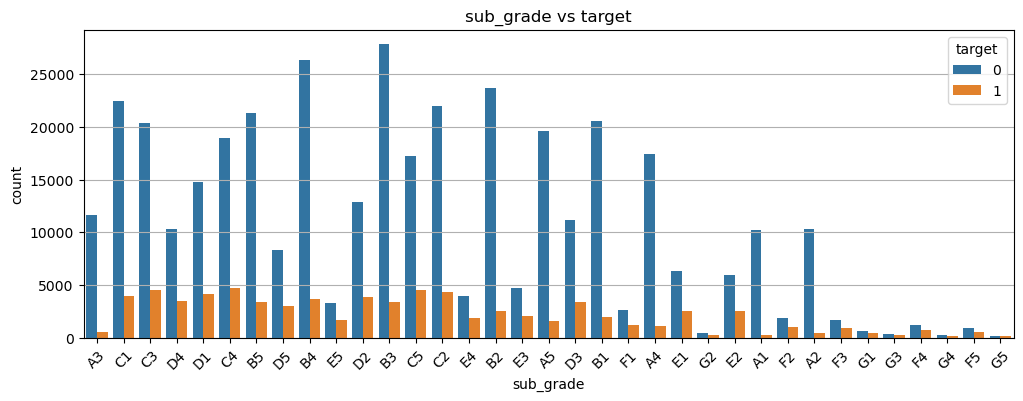

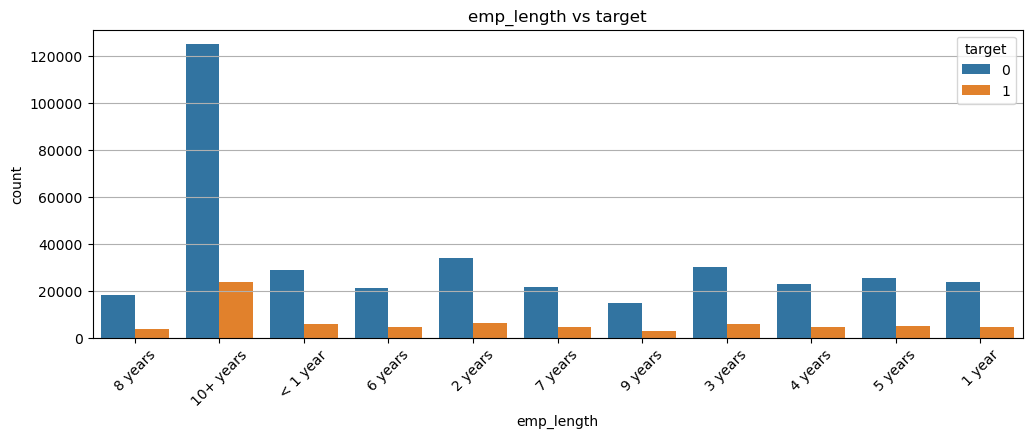

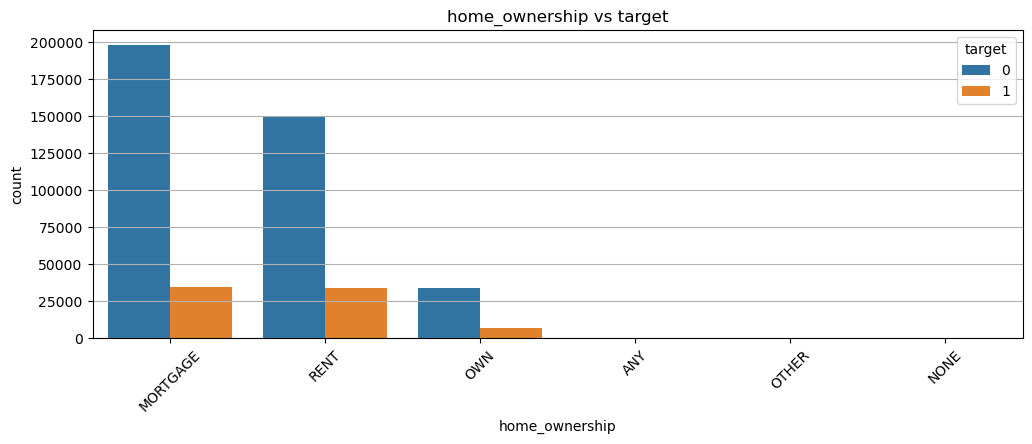

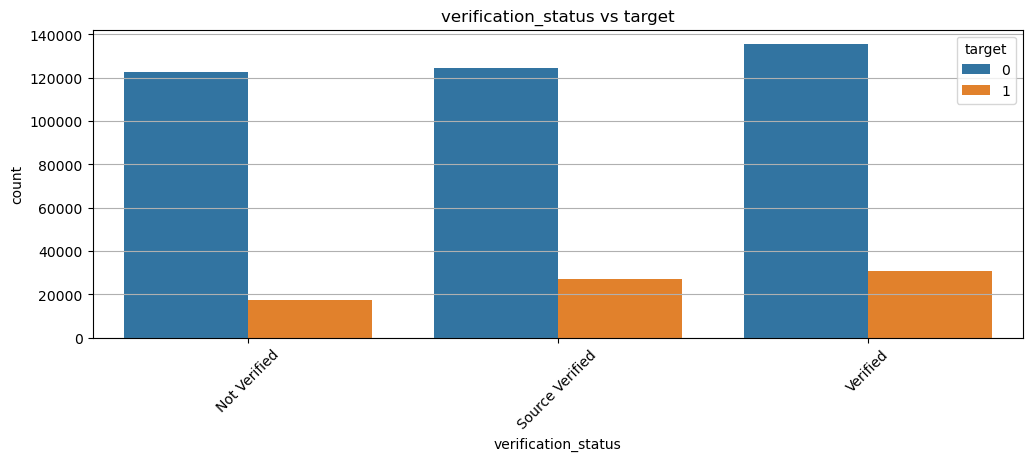

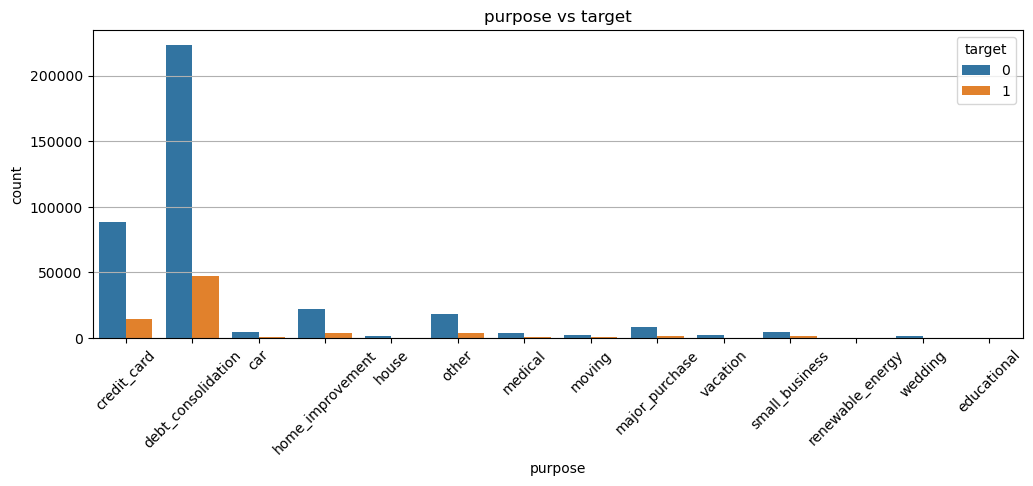

In [13]:
variables_categoricas = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
                         'verification_status', 'purpose']

for col in variables_categoricas:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df_modelo, x=col, hue='target')
    plt.title(f'{col} vs target')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

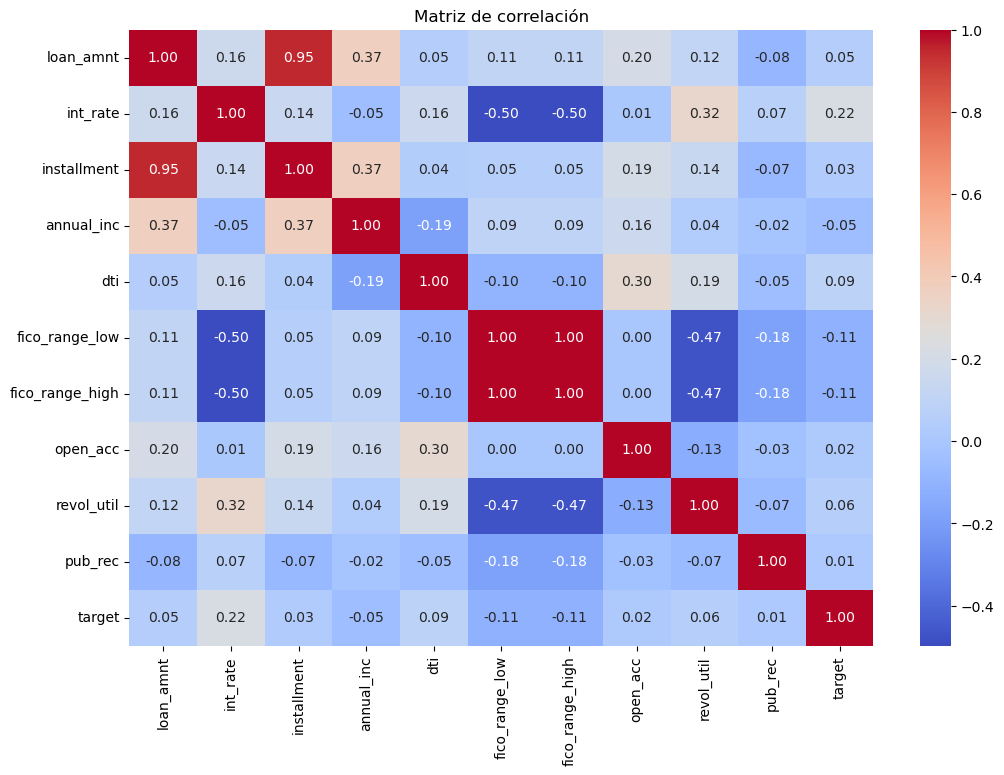

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df_modelo.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [15]:
#installment es una función directa de loan_amnt, int_rate y term, por lo tanto no agrega nueva información.

#fico_range_high y fico_range_low son muy parecidos, y su uso conjunto introduce duplicidad. Elegimos uno (por ejemplo, fico_range_low) para mantener representatividad sin redundancia.

variables_a_eliminar = ['installment', 'fico_range_high']

df_modelo.drop(columns=variables_a_eliminar, inplace=True)

In [16]:
df_modelo.describe

<bound method NDFrame.describe of          loan_amnt        term  int_rate grade sub_grade emp_length  \
1117060    10400.0   36 months      6.99     A        A3    8 years   
1117061    15000.0   60 months     12.39     C        C1  10+ years   
1117062     9600.0   36 months     13.66     C        C3  10+ years   
1117063     7650.0   36 months     13.66     C        C3   < 1 year   
1117064    12800.0   60 months     17.14     D        D4  10+ years   
...            ...         ...       ...   ...       ...        ...   
1939374    20500.0   36 months     16.77     D        D2    7 years   
1939375    15000.0   36 months     15.27     C        C4    3 years   
1939376    35000.0   36 months     15.96     C        C5    3 years   
1939377    12000.0   36 months     16.29     D        D1        NaN   
1939378    12000.0   60 months     15.27     C        C4    7 years   

        home_ownership  annual_inc verification_status             purpose  \
1117060       MORTGAGE     58000.0 

In [17]:
# Asegurar que 'term' sea string y extraer el número de meses (ej. 36, 60)
df_modelo['term'] = df_modelo['term'].astype(str)
df_modelo['term'] = df_modelo['term'].str.extract(r'(\d+)').astype(int)

# Convertir 'int_rate' a número (float) quitando el símbolo %
df_modelo['int_rate'] = df_modelo['int_rate'].astype(str).str.replace('%', '', regex=False).astype(float)

# Convertir 'revol_util' a número quitando el símbolo %
df_modelo['revol_util'] = df_modelo['revol_util'].astype(str).str.replace('%', '', regex=False)
df_modelo['revol_util'] = pd.to_numeric(df_modelo['revol_util'], errors='coerce')

# Convertir 'emp_length' a número de años
df_modelo['emp_length'] = df_modelo['emp_length'].replace({
    '10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7,
    '6 years': 6, '5 years': 5, '4 years': 4, '3 years': 3,
    '2 years': 2, '1 year': 1, '< 1 year': 0, 'n/a': np.nan
}).astype(float)

# Codificar variables categóricas como dummies
categoricas = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose']
df_modelo = pd.get_dummies(df_modelo, columns=categoricas, drop_first=True)

C:\Users\Renan\AppData\Local\Temp\ipykernel_25496\622174924.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_modelo['emp_length'] = df_modelo['emp_length'].replace({


In [18]:
df_modelo.describe

<bound method NDFrame.describe of          loan_amnt  term  int_rate  emp_length  annual_inc    dti  \
1117060    10400.0    36      6.99         8.0     58000.0  14.92   
1117061    15000.0    60     12.39        10.0     78000.0  12.03   
1117062     9600.0    36     13.66        10.0     69000.0  25.81   
1117063     7650.0    36     13.66         0.0     50000.0  34.81   
1117064    12800.0    60     17.14        10.0    125000.0   8.31   
...            ...   ...       ...         ...         ...    ...   
1939374    20500.0    36     16.77         7.0     60000.0  16.40   
1939375    15000.0    36     15.27         3.0     57600.0   8.35   
1939376    35000.0    36     15.96         3.0    160000.0   4.90   
1939377    12000.0    36     16.29         NaN     35000.0  12.93   
1939378    12000.0    60     15.27         7.0     50000.0   5.50   

         fico_range_low  open_acc  revol_util  pub_rec  ...  \
1117060           710.0      17.0        31.6      0.0  ...   
1117061    

Distribución de variables Numéricas 

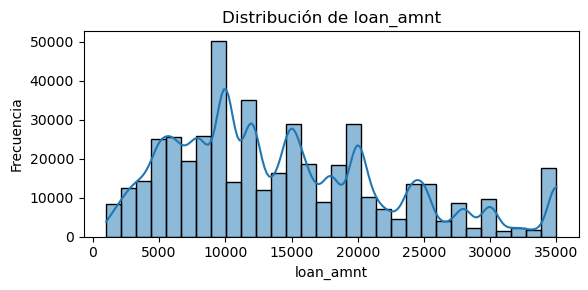

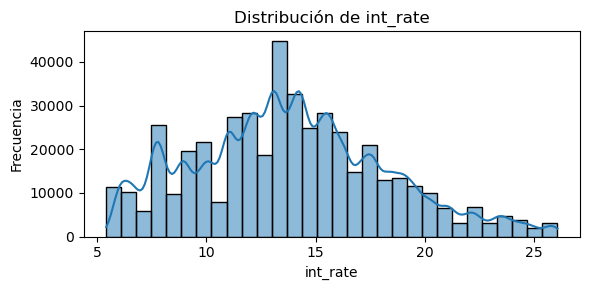

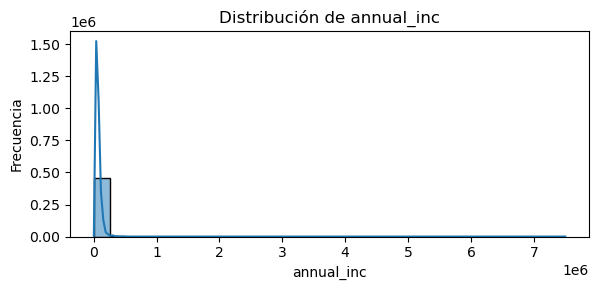

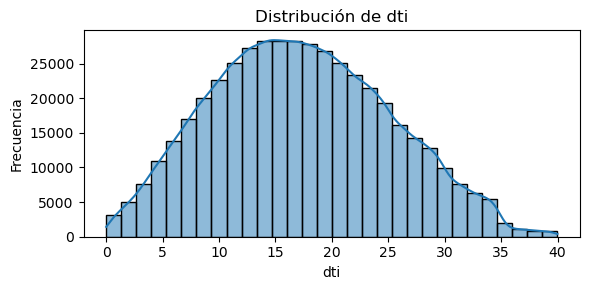

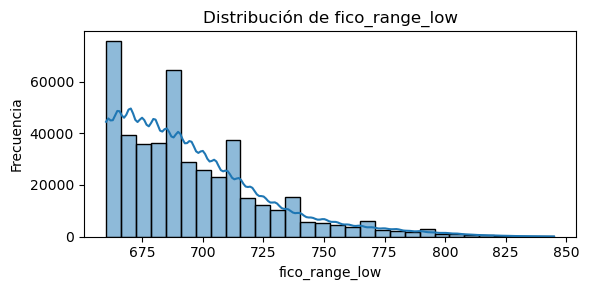

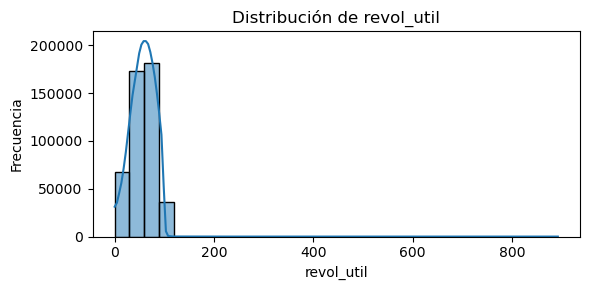

In [19]:
numericas = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low', 'revol_util']

for col in numericas:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_modelo[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

#Tratamiento de nulos

In [20]:
porcentaje_nulos = df_modelo.isnull().mean() * 100
porcentaje_nulos[porcentaje_nulos > 0].sort_values()

revol_util    0.061126
emp_length    4.588402
dtype: float64

In [21]:
missing = df_modelo.isnull().sum()
missing = missing[missing > 0]
print("Variables con valores nulos:\n", missing)

Variables con valores nulos:
 emp_length    21018
revol_util      280
dtype: int64


In [22]:
df_modelo['emp_length'] = df_modelo['emp_length'].fillna(df_modelo['emp_length'].median())
df_modelo['revol_util'] = df_modelo['revol_util'].fillna(df_modelo['revol_util'].median())

In [23]:
missing = df_modelo.isnull().sum()
missing = missing[missing > 0]
print("Variables con valores nulos:\n", missing)

Variables con valores nulos:
 Series([], dtype: int64)


#df_modelo.to_excel(r'C:\Users\Renan\Desktop\df_modelo_v2.xlsx', index=False)

In [24]:
#Modelado Predictivo 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df_modelo.drop(columns='target')
y = df_modelo['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [26]:
from sklearn.preprocessing import StandardScaler

# Escalado solo de X (no la target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(
    max_iter=1000,           # Puedes empezar con 1000 si ya escalaste
    solver='saga',
    class_weight='balanced',
    random_state=42
)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='saga')

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\Renan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:56:45] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [29]:
modelos = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

for nombre, modelo in modelos.items():
    print(f"📌 Resultados para: {nombre}")
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1]
    
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("-" * 60)


📌 Resultados para: Logistic Regression


C:\Users\Renan\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Renan\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Renan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Renan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Renan\ana

              precision    recall  f1-score   support

           0       0.83      1.00      0.91    114737
           1       0.00      0.00      0.00     22684

    accuracy                           0.83    137421
   macro avg       0.42      0.50      0.46    137421
weighted avg       0.70      0.83      0.76    137421

ROC AUC: 0.5
------------------------------------------------------------
📌 Resultados para: Random Forest
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    114737
           1       0.43      0.02      0.03     22684

    accuracy                           0.83    137421
   macro avg       0.63      0.51      0.47    137421
weighted avg       0.77      0.83      0.76    137421

ROC AUC: 0.6660681763067947
------------------------------------------------------------
📌 Resultados para: XGBoost
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    114737
           1  

In [30]:
from imblearn.over_sampling import SMOTE

# Separar variables predictoras y target
X = df_modelo.drop(columns='target')
y = df_modelo['target']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Inicializar modelos
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Entrenamiento
rf_model.fit(X_resampled, y_resampled)
xgb_model.fit(X_resampled, y_resampled)

# Evaluación
modelos = {
    'Random Forest (SMOTE)': rf_model,
    'XGBoost (SMOTE)': xgb_model
}

for nombre, modelo in modelos.items():
    print(f"\n📌 Resultados con SMOTE para: {nombre}")
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("-" * 60)


C:\Users\Renan\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:04:36] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📌 Resultados con SMOTE para: Random Forest (SMOTE)
              precision    recall  f1-score   support

           0       0.84      0.99      0.91    114737
           1       0.40      0.03      0.06     22684

    accuracy                           0.83    137421
   macro avg       0.62      0.51      0.48    137421
weighted avg       0.77      0.83      0.77    137421

ROC AUC: 0.6632913818775973
------------------------------------------------------------

📌 Resultados con SMOTE para: XGBoost (SMOTE)
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    114737
           1       0.46      0.01      0.03     22684

    accuracy                           0.83    137421
   macro avg       0.65      0.51      0.47    137421
weighted avg       0.77      0.83      0.76    137421

ROC AUC: 0.6893714666602688
------------------------------------------------------------


In [31]:
from sklearn.metrics import classification_report

# Probabilidades de morosidad (ya entrenaste y tienes y_proba)
# Ejemplo: y_proba = rf_model.predict_proba(X_test)[:,1]

for threshold in [0.5, 0.4, 0.3, 0.2, 0.1]:
    y_pred_thr = (y_proba >= threshold).astype(int)
    print(f"\n=== Threshold: {threshold} ===")
    print(classification_report(y_test, y_pred_thr))


=== Threshold: 0.5 ===
              precision    recall  f1-score   support

           0       0.84      1.00      0.91    114737
           1       0.46      0.01      0.03     22684

    accuracy                           0.83    137421
   macro avg       0.65      0.51      0.47    137421
weighted avg       0.77      0.83      0.76    137421


=== Threshold: 0.4 ===
              precision    recall  f1-score   support

           0       0.84      0.98      0.91    114737
           1       0.42      0.08      0.13     22684

    accuracy                           0.83    137421
   macro avg       0.63      0.53      0.52    137421
weighted avg       0.77      0.83      0.78    137421


=== Threshold: 0.3 ===
              precision    recall  f1-score   support

           0       0.86      0.91      0.88    114737
           1       0.35      0.24      0.29     22684

    accuracy                           0.80    137421
   macro avg       0.60      0.58      0.58    137421
we

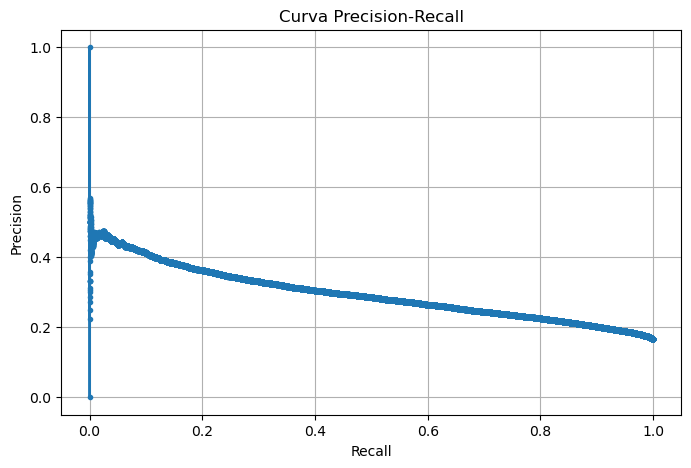

In [32]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8,5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid()
plt.show()

=== Random Forest, threshold 0.2 ===
              precision    recall  f1-score   support

           0       0.89      0.62      0.73    114737
           1       0.24      0.61      0.35     22684

    accuracy                           0.62    137421
   macro avg       0.57      0.62      0.54    137421
weighted avg       0.78      0.62      0.67    137421

=== XGBoost, threshold 0.2 ===
              precision    recall  f1-score   support

           0       0.89      0.72      0.79    114737
           1       0.28      0.55      0.37     22684

    accuracy                           0.69    137421
   macro avg       0.58      0.63      0.58    137421
weighted avg       0.79      0.69      0.72    137421

=== Logistic Regression, threshold 0.2 ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91    114737
           1       0.00      0.00      0.00     22684

    accuracy                           0.83    137421
   macro avg     

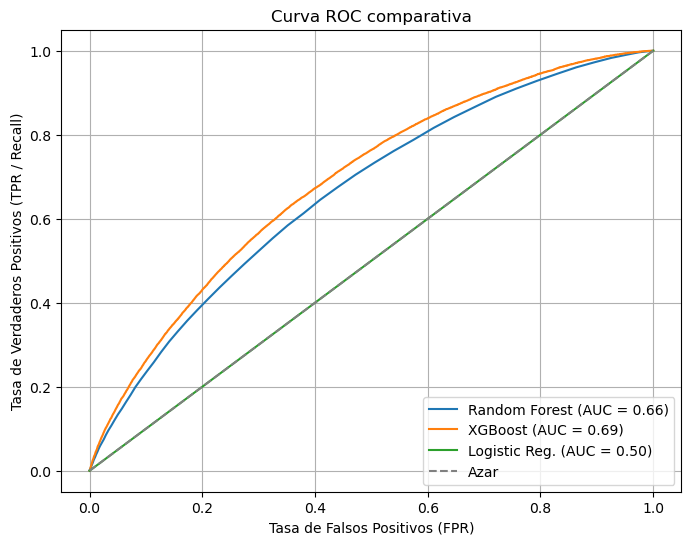

In [33]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# --- RANDOM FOREST ---
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = (y_proba_rf >= 0.2).astype(int)
print("=== Random Forest, threshold 0.2 ===")
print(classification_report(y_test, y_pred_rf))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# --- XGBOOST ---
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = (y_proba_xgb >= 0.2).astype(int)
print("=== XGBoost, threshold 0.2 ===")
print(classification_report(y_test, y_pred_xgb))

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# --- LOGISTIC REGRESSION ---
y_proba_log = log_model.predict_proba(X_test)[:, 1]
y_pred_log = (y_proba_log >= 0.2).astype(int)
print("=== Logistic Regression, threshold 0.2 ===")
print(classification_report(y_test, y_pred_log))

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
auc_log = auc(fpr_log, tpr_log)

# --- GRAFICO CURVA ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Reg. (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Azar')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR / Recall)')
plt.title('Curva ROC comparativa')
plt.legend(loc='lower right')
plt.grid()
plt.show()


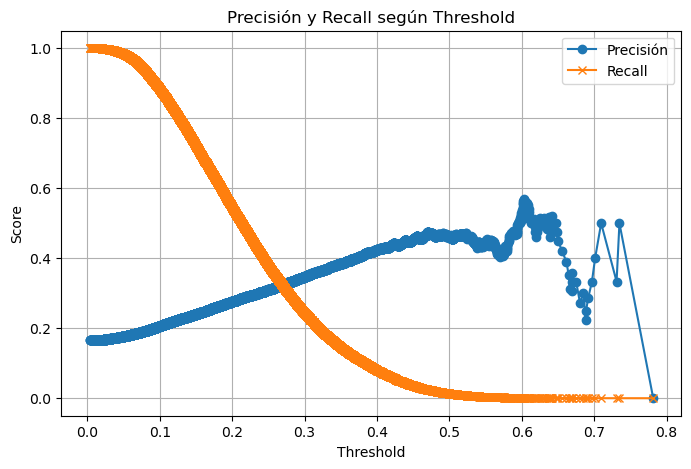

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Suponiendo que tienes y_test y y_proba (probabilidad de moroso)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label="Precisión", marker='o')
plt.plot(thresholds, recall[:-1], label="Recall", marker='x')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisión y Recall según Threshold")
plt.legend()
plt.grid()
plt.show()


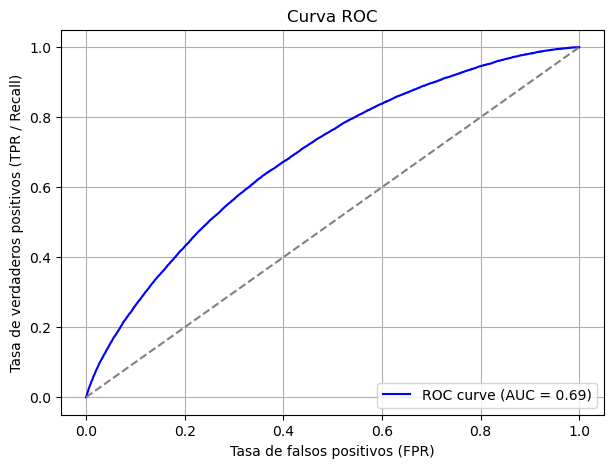

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Suponiendo que tienes y_test y y_proba (probabilidad de clase 1, moroso)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR / Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#Interpratibilidad del modelo 

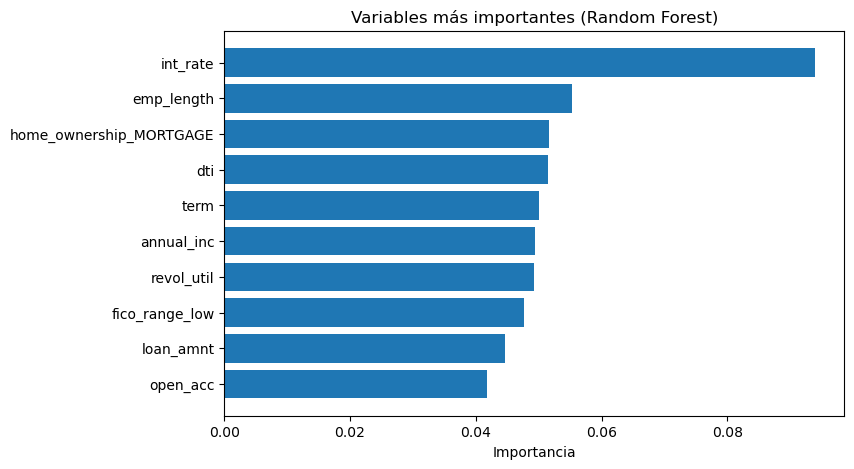

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes entrenado tu modelo y X_train.columns

importancias = rf_model.feature_importances_  # o xgb_model.feature_importances_
feat_names = X_train.columns
feat_imp_df = pd.DataFrame({'feature': feat_names, 'importance': importancias}).sort_values(by='importance', ascending=False)

# Gráfica de las top 10 variables más importantes
plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['feature'][:10][::-1], feat_imp_df['importance'][:10][::-1])
plt.xlabel("Importancia")
plt.title("Variables más importantes (Random Forest)")
plt.show()


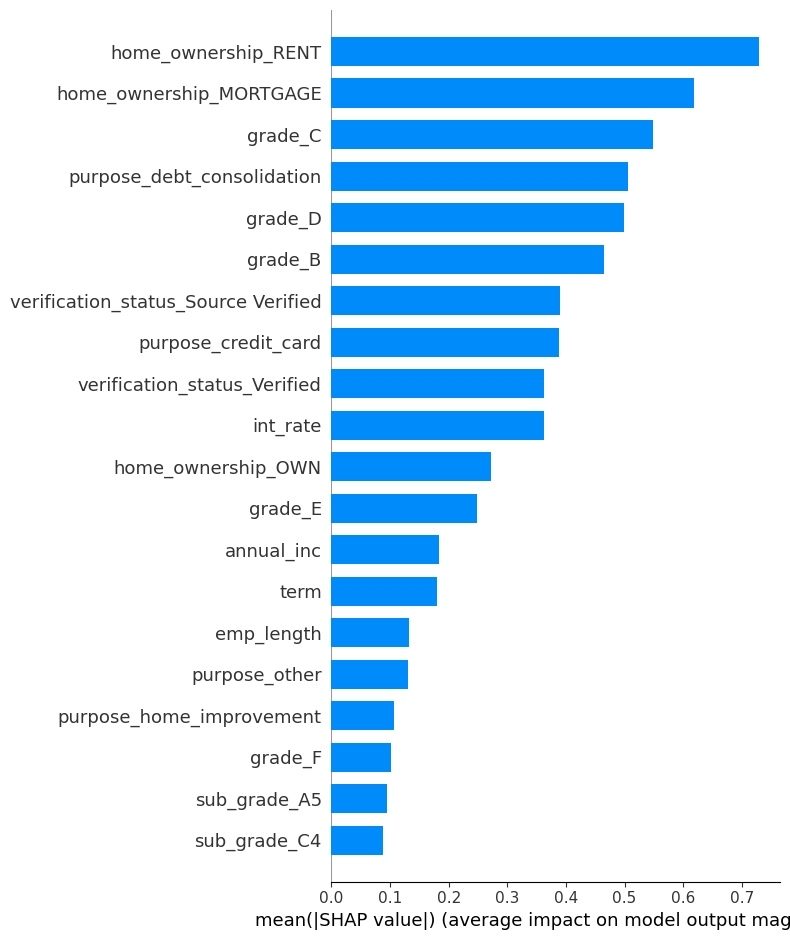

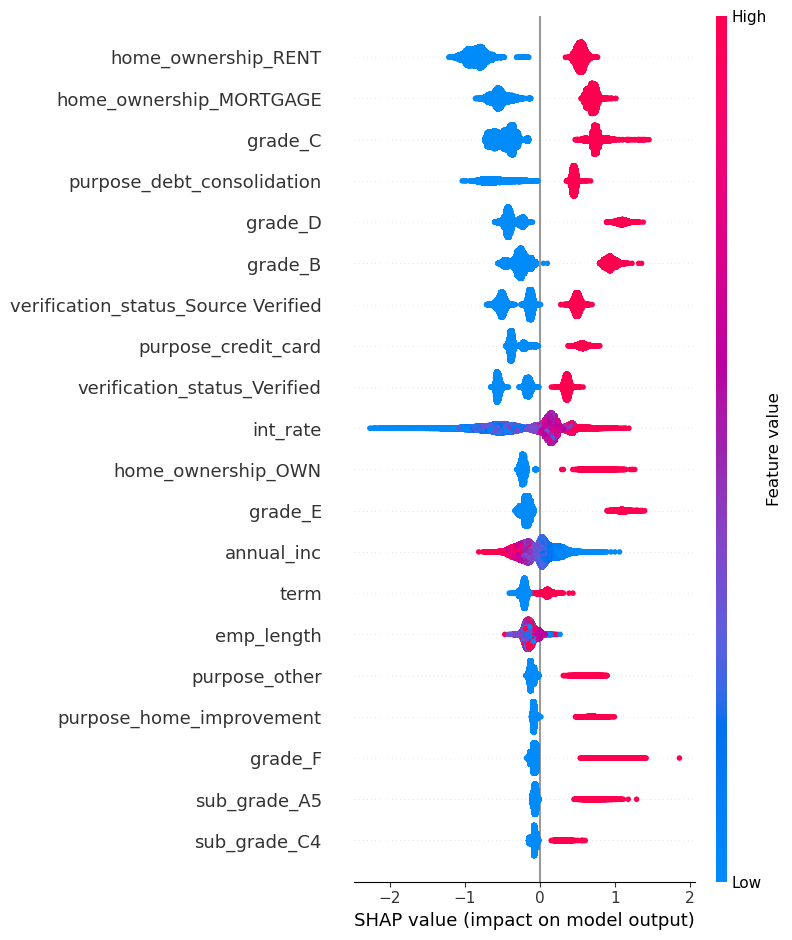

In [37]:
import shap

explainer = shap.TreeExplainer(xgb_model)  # Usa tu mejor modelo
shap_values = explainer.shap_values(X_test)

# Resumen de importancia de features
shap.summary_plot(shap_values, X_test, plot_type="bar")
# O la clásica plot de dispersión SHAP
shap.summary_plot(shap_values, X_test)

In [38]:
df_modelo.info()  # Tipos de datos y nulos

<class 'pandas.core.frame.DataFrame'>
Index: 458068 entries, 1117060 to 1939378
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            458068 non-null  float64
 1   term                                 458068 non-null  int32  
 2   int_rate                             458068 non-null  float64
 3   emp_length                           458068 non-null  float64
 4   annual_inc                           458068 non-null  float64
 5   dti                                  458068 non-null  float64
 6   fico_range_low                       458068 non-null  float64
 7   open_acc                             458068 non-null  float64
 8   revol_util                           458068 non-null  float64
 9   pub_rec                              458068 non-null  float64
 10  target                               458068 non-null  int64  
 11  grade_B    

#validación cruzada

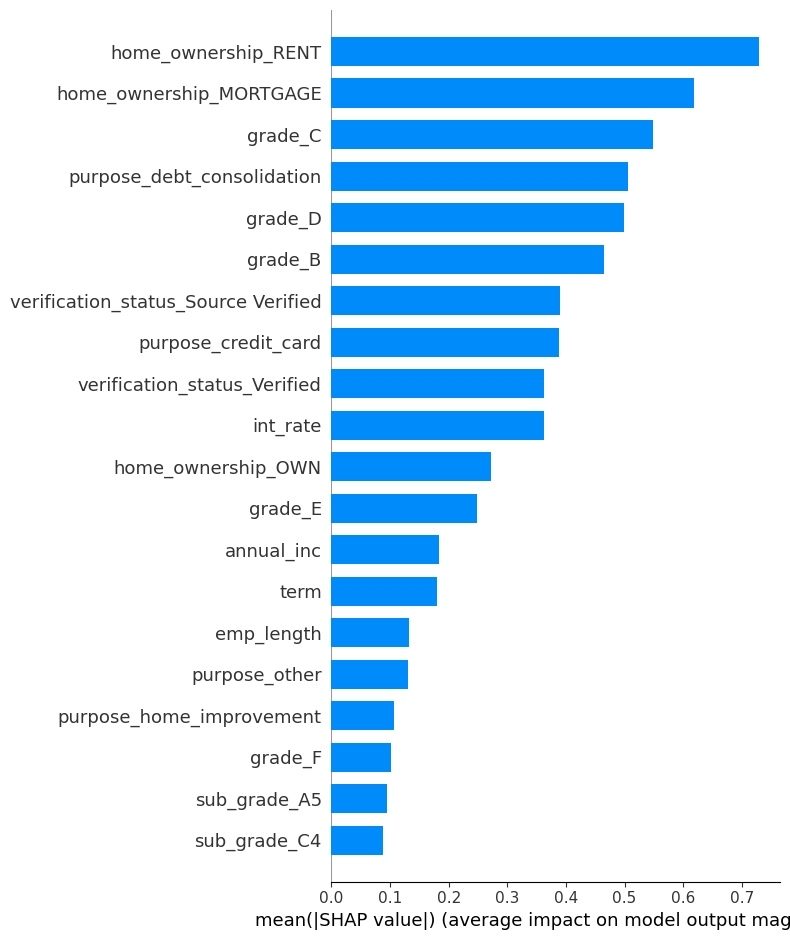

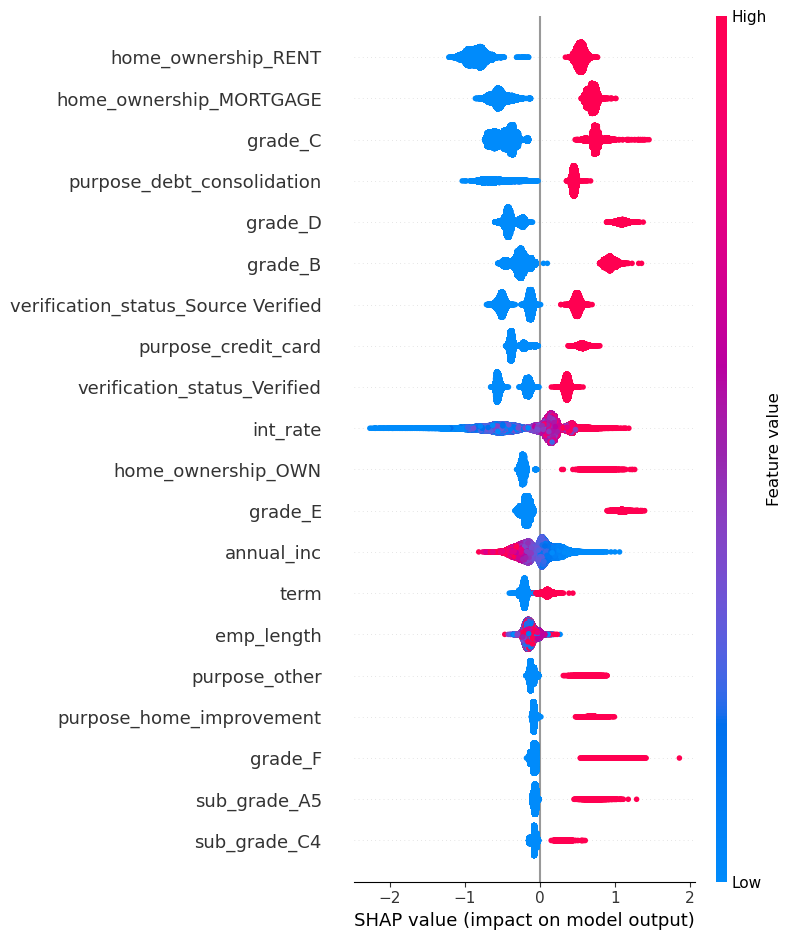

In [39]:
# Explicador SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary Plot: importancia global de variables
shap.summary_plot(shap_values, X_test, plot_type="bar")  # barras
shap.summary_plot(shap_values, X_test)                   # dispersión

# Explicación individual de un ejemplo:
shap.initjs()
i = 0  # índice de ejemplo a explicar
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:])

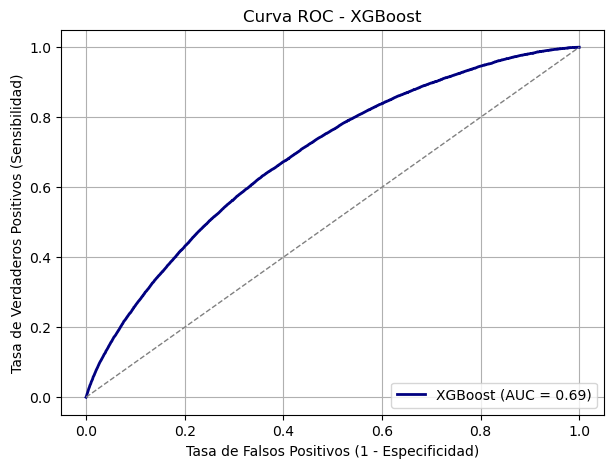

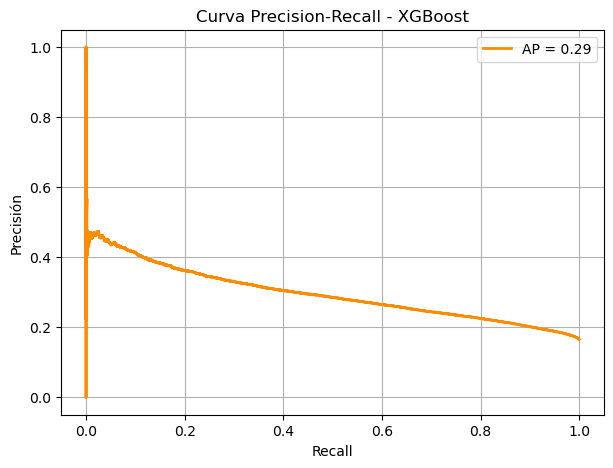

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Suponiendo que ya tienes y_test y y_proba_xgb (probabilidades del modelo XGBoost)

# --- CURVA ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- CURVA PRECISION-RECALL ---
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_xgb)
avg_precision = average_precision_score(y_test, y_proba_xgb)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precision-Recall - XGBoost')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


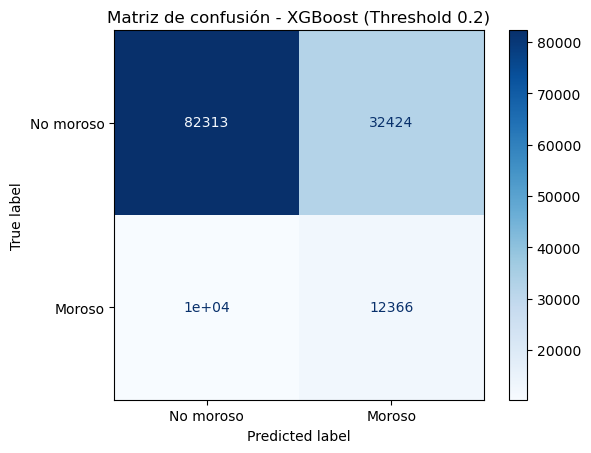

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que ya tienes y_test y y_proba_xgb (probabilidades del modelo XGBoost)
import numpy as np

# Aplica el threshold de 0.2
y_pred_xgb_02 = (y_proba_xgb >= 0.2).astype(int)

# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred_xgb_02)

# Muestra la matriz de confusión graficada
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No moroso", "Moroso"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión - XGBoost (Threshold 0.2)')
plt.grid(False)
plt.show()


In [42]:
from sklearn.metrics import classification_report, roc_auc_score

# Suponiendo que tienes tus predicciones y probabilidades:
# y_test: tu variable real de test
# y_pred_rf, y_pred_xgb, y_pred_log: predicciones binarias de cada modelo
# y_proba_rf, y_proba_xgb, y_proba_log: probabilidades de cada modelo

# Calcular los reports
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_log = classification_report(y_test, y_pred_log, output_dict=True)

# Calcular ROC AUC
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
auc_log = roc_auc_score(y_test, y_proba_log)

# Armar la tabla
data = {
    'Modelo': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Threshold': [0.2, 0.2, 0.2],
    'Accuracy': [
        report_rf['accuracy'],
        report_xgb['accuracy'],
        report_log['accuracy']
    ],
    'Recall (moroso)': [
        report_rf['1']['recall'],
        report_xgb['1']['recall'],
        report_log['1']['recall']
    ],
    'Precision (moroso)': [
        report_rf['1']['precision'],
        report_xgb['1']['precision'],
        report_log['1']['precision']
    ],
    'F1-score (moroso)': [
        report_rf['1']['f1-score'],
        report_xgb['1']['f1-score'],
        report_log['1']['f1-score']
    ],
    'ROC AUC': [auc_rf, auc_xgb, auc_log]
}

import pandas as pd
df_comparativa = pd.DataFrame(data)
display(df_comparativa)
df_comparativa.to_excel('tabla_comparativa_resultados.xlsx', index=False)


,Modelo,Threshold,Accuracy,Recall (moroso),Precision (moroso),F1-score (moroso),ROC AUC
0,Random Forest,0.2,0.619127,0.612943,0.241960,0.346958,0.663291
1,XGBoost,0.2,0.688970,0.545142,0.276088,0.366541,0.689371
2,Logistic Regression,0.2,0.834931,0.000000,0.000000,0.000000,0.500000


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# --- BLOQUE DE PRUEBAS RÁPIDAS ---

# 1. Tomar solo una muestra pequeña (20%)
X_small = X.sample(frac=1, random_state=42)
y_small = y.loc[X_small.index]

# 2. Usar solo 3 folds para acelerar
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 3. Modelos con pocos árboles
rf_model = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, class_weight='balanced')
xgb_model = XGBClassifier(n_estimators=10, n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='logloss')
log_model = LogisticRegression(max_iter=500, solver='saga', class_weight='balanced', random_state=42)

results_rf, results_xgb, results_log = [], [], []
auc_rf_list, auc_xgb_list, auc_log_list = [], [], []

for train_idx, test_idx in kf.split(X_small, y_small):
    X_train, X_test = X_small.iloc[train_idx], X_small.iloc[test_idx]
    y_train, y_test = y_small.iloc[train_idx], y_small.iloc[test_idx]
    
    # --- Random Forest ---
    rf_model.fit(X_train, y_train)
    y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
    y_pred_rf = (y_proba_rf >= 0.2).astype(int)
    results_rf.append(classification_report(y_test, y_pred_rf, output_dict=True))
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
    auc_rf_list.append(auc(fpr_rf, tpr_rf))

    # --- XGBoost ---
    xgb_model.fit(X_train, y_train)
    y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    y_pred_xgb = (y_proba_xgb >= 0.2).astype(int)
    results_xgb.append(classification_report(y_test, y_pred_xgb, output_dict=True))
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
    auc_xgb_list.append(auc(fpr_xgb, tpr_xgb))

    # --- Logistic Regression ---
    log_model.fit(X_train, y_train)
    y_proba_log = log_model.predict_proba(X_test)[:, 1]
    y_pred_log = (y_proba_log >= 0.2).astype(int)
    results_log.append(classification_report(y_test, y_pred_log, output_dict=True))
    fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
    auc_log_list.append(auc(fpr_log, tpr_log))

def average_report(results):
    metrics = ['precision', 'recall', 'f1-score', 'support']
    avg = {}
    for cls in ['0', '1', 'macro avg', 'weighted avg']:
        avg[cls] = {metric: np.mean([fold[cls][metric] for fold in results]) for metric in metrics if metric in results[0][cls]}
    return pd.DataFrame(avg).T

print("=== RANDOM FOREST (PRUEBA) ===")
print(average_report(results_rf))
print(f"ROC AUC promedio: {np.mean(auc_rf_list):.3f}\n")

print("=== XGBOOST (PRUEBA) ===")
print(average_report(results_xgb))
print(f"ROC AUC promedio: {np.mean(auc_xgb_list):.3f}\n")

print("=== LOGISTIC REGRESSION (PRUEBA) ===")
print(average_report(results_log))
print(f"ROC AUC promedio: {np.mean(auc_log_list):.3f}\n")

# Puedes subir n_estimators para mejor rendimiento final (ej: 100, 200)
xgb_model_final = XGBClassifier(
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model_final.fit(X_small, y_small)  # O usa X_train, y_train si tienes split tradicional

# Si usaste scaler:
# scaler.fit(X_small)
# X_small_scaled = scaler.transform(X_small)
# xgb_model_final.fit(X_small_scaled, y_small)


=== RANDOM FOREST (PRUEBA) ===
              precision    recall  f1-score        support
0              0.878780  0.570470  0.691829  127485.000000
1              0.216962  0.601973  0.318963   25204.333333
macro avg      0.547871  0.586221  0.505396  152689.333333
weighted avg   0.769534  0.575670  0.630281  152689.333333
ROC AUC promedio: 0.615

=== XGBOOST (PRUEBA) ===
              precision    recall  f1-score        support
0              0.886566  0.731325  0.801497  127485.000000
1              0.279319  0.526708  0.365048   25204.333333
macro avg      0.582943  0.629017  0.583272  152689.333333
weighted avg   0.786328  0.697549  0.729453  152689.333333
ROC AUC promedio: 0.689

=== LOGISTIC REGRESSION (PRUEBA) ===
              precision    recall  f1-score        support
0              0.903339  0.005373  0.010683  127485.000000
1              0.165411  0.997090  0.283749   25204.333333
macro avg      0.534375  0.501232  0.147216  152689.333333
weighted avg   0.781530  0.1690

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [44]:
# Calcula los promedios relevantes para cada modelo
df_rf = average_report(results_rf)
df_xgb = average_report(results_xgb)
df_log = average_report(results_log)

# Extrae las métricas principales para la clase 1 (moroso)
data = {
    'Modelo': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Threshold': [0.2, 0.2, 0.2],
    'Accuracy': [
        df_rf.loc['accuracy', 'precision'] if 'accuracy' in df_rf.index else np.nan,
        df_xgb.loc['accuracy', 'precision'] if 'accuracy' in df_xgb.index else np.nan,
        df_log.loc['accuracy', 'precision'] if 'accuracy' in df_log.index else np.nan
    ],
    'Recall (moroso)': [
        df_rf.loc['1', 'recall'],
        df_xgb.loc['1', 'recall'],
        df_log.loc['1', 'recall']
    ],
    'Precision (moroso)': [
        df_rf.loc['1', 'precision'],
        df_xgb.loc['1', 'precision'],
        df_log.loc['1', 'precision']
    ],
    'F1-score (moroso)': [
        df_rf.loc['1', 'f1-score'],
        df_xgb.loc['1', 'f1-score'],
        df_log.loc['1', 'f1-score']
    ],
    'ROC AUC': [
        np.mean(auc_rf_list),
        np.mean(auc_xgb_list),
        np.mean(auc_log_list)
    ]
}

# Crea el DataFrame comparativo
df_comparativa = pd.DataFrame(data)
print("\n=== TABLA COMPARATIVA DE MODELOS ===")
print(df_comparativa)

# Si lo deseas, guarda para tu informe en Excel
df_comparativa.to_excel("tabla_comparativa_prueba.xlsx", index=False)



=== TABLA COMPARATIVA DE MODELOS ===
                Modelo  Threshold  Accuracy  Recall (moroso)  \
0        Random Forest        0.2       NaN         0.601973   
1              XGBoost        0.2       NaN         0.526708   
2  Logistic Regression        0.2       NaN         0.997090   

   Precision (moroso)  F1-score (moroso)   ROC AUC  
0            0.216962           0.318963  0.615187  
1            0.279319           0.365048  0.689110  
2            0.165411           0.283749  0.593326  


In [45]:
import joblib

# Tu modelo XGBoost entrenado
joblib.dump(xgb_model_final, 'xgb_model.pkl')

# Tu scaler (ejemplo: StandardScaler o MinMaxScaler)
joblib.dump(scaler, 'scaler.pkl')

# Tus columnas finales (incluyendo todas las dummies)
joblib.dump(list(X_train.columns), 'columnas_modelo.pkl')


['columnas_modelo.pkl']

In [46]:
import streamlit as st
import joblib

# Cargar modelo y scaler
model = joblib.load('xgb_model.pkl')  # Debe ser el modelo entrenado con todos los datos y preprocesamiento
scaler = joblib.load('scaler.pkl')

# Lista de columnas que espera el modelo
cols_modelo = joblib.load('columnas_modelo.pkl')  # Guarda esta lista tras entrenar el modelo

st.title("Predicción de Morosidad de Préstamo")

# Inputs de usuario (ajusta a tus variables)
loan_amnt = st.number_input('Monto del préstamo', min_value=500, max_value=50000, value=10000)
int_rate = st.number_input('Tasa de interés (%)', min_value=5.0, max_value=30.0, value=12.5)
emp_length = st.number_input('Años de antigüedad laboral', min_value=0, max_value=40, value=5)
annual_inc = st.number_input('Ingreso anual', min_value=5000, max_value=300000, value=35000)
home_ownership = st.selectbox('Tipo de vivienda', ['RENT', 'MORTGAGE', 'OWN'])

# Armado de input exactamente igual que en el entrenamiento
input_dict = {
    'loan_amnt': loan_amnt,
    'int_rate': int_rate,
    'emp_length': emp_length,
    'annual_inc': annual_inc,
    'home_ownership_RENT': 1 if home_ownership == 'RENT' else 0,
    'home_ownership_MORTGAGE': 1 if home_ownership == 'MORTGAGE' else 0,
    'home_ownership_OWN': 1 if home_ownership == 'OWN' else 0,
    # agrega los demás según tu modelo
}

# 
input_df = pd.DataFrame([input_dict])
for col in cols_modelo:
    if col not in input_df.columns:
        input_df[col] = 0
input_df = input_df[cols_modelo]  # Orden correcto

# Escalado
input_scaled = scaler.transform(input_df)

st.write("Clases del modelo:", model.classes_)
st.write("Valores de entrada para el modelo:")
st.write(input_df)

if st.button('Predecir morosidad'):
    proba = model.predict_proba(input_scaled)[0, 1]
    st.write(f"Probabilidad de morosidad: {proba:.2f}")
    st.write(f"(DEBUG) Probabilidad cruda: {proba}")
    if proba >= 0.2:
        st.error("ALERTA: Alta probabilidad de morosidad (umbral 0.2).")
    else:
        st.success("Baja probabilidad de morosidad.")

st.caption("TFM - José Renán Acevedo")


2025-07-14 23:35:46.849 
  command:

    streamlit run C:\Users\Renan\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-14 23:35:46.853 Session state does not function when running a script without `streamlit run`


DeltaGenerator()